<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Hypothesis Testing**


Estimated time needed: **30** minutes


Leveraging customer information is of paramount importance for most businesses. Imagine that you are an insurance analyst (actuarian) who needs to assess the insurability or the risks of his/her customers. Part of your job is to look at customer attributes such as age, sex, BMI, smokers/non-smokers, location, etc., and to use them in your decision-making process on whether to churn or approve their claims.

This lab will guide you through the series of steps in hypothesis testing to help you decide, using the statistical evidence, a certain effect of an attribute or a combination of attributes on the insurance claims. This lab will only introduce you to the initial steps in the decision making, before building the prediction models and classifiers.


## Objectives


After completing this lab you will be able to:


*   Understand the elements of hypothesis testing
    *   Choose a sample statistic
    *   Define hypothesis
    *   Set the decision criteria
    *   Evaluate and interpret the results


***


## **Setup**


For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01) for mathematical operations.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01) for visualizing the data.
*   [`scipy.stats`](https://docs.scipy.org/doc/scipy/reference/stats.html/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01) for statistical analysis.
*   [`statsmodels`](https://www.statsmodels.org/stable/index.html/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01) for statistical analysis.


## **Installing Required Libraries**


The following required modules are pre-installed in the Skills Network Labs environment. However if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [78]:
%pip install pandas numpy seaborn matplotlib scipy statsmodels pingouin piplite

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement piplite (from versions: none)
ERROR: No matching distribution found for piplite


In [79]:
# Import required libraries for data analysis and visualization
import numpy as np                 # For numerical computations
import pandas as pd               # For data manipulation and analysis
import seaborn as sns            # For statistical data visualization
import matplotlib.pyplot as plt  # For creating plots
import scipy.stats as stats     # For statistical tests
import pingouin as pg           # For advanced statistical analysis

In [80]:
import warnings 
warnings.filterwarnings('ignore')

In [81]:
# Load data from URL
import requests
import pandas as pd

url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0232EN-SkillsNetwork/asset/insurance.csv'

# Read the CSV file directly from URL
data = pd.read_csv(url)

print("Dataset loaded successfully!")

Dataset loaded successfully!


## **Reading and understanding our data**


For this lab, we will be using the <code>insurance.csv</code> file, hosted on IBM Cloud object.

This dataset contains information about age, sex, BMI, the number of children, whether the client is smoker or non-smoker, region where the client lives, and the charges to their insurance company.


Let's read the data into *pandas* data frame and look at the first 5 rows using the `head()` method.


In [82]:
# Define URL for the dataset
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0232EN-SkillsNetwork/asset/insurance.csv'

# Read the dataset directly from URL
data = pd.read_csv(URL)

# Display first few rows of the data
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


By using `info` function, we will take a look at our types of data.


In [83]:
# Display information about the dataset including data types and non-null counts
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


The `describe()` function provides the statistical information about the numeric variables.


In [84]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


According to the brief preview of our data, we will define the 'charges' to be our response variable, and 'age', 'sex', 'bmi', 'children', 'smoker', and 'region' to be our predictor variables. In this lab, we will test how our predictor variables influence the insurance 'charges'.


## **Steps in Hypothesis Testing**


## Example 1

In this first example, we will show how to prove (or disprove), with statistical evidence, that the BMI of females is different from that of males.


### 1. Choose a sample statistic


The first step in hypothesis testing is to choose a sample test statistic. Hypothesis testing allows us to check the sample statistic against a statistic of another sample or population. Let  𝜇1 be the population mean for BMI of males and 𝜇2 be the the population mean for BMI of females. We will compare these mean values, :$\mu\_{1}$ and $\mu\_{2}$, statistically.


### 2. Define hypothesis (Null and Alternative)


The next step is to define the hypothesis to be tested. Hypothesis is defined in two ways - null hypothesis and alternative hypothesis. Null hypothesis is a statistical hypothesis which assumes that the difference in observations is due to a random factor. It is denoted by Ho. Alternative hypothesis is the opposite of null hypothesis. It assumes that the difference in observations is the result of a real effect. The alternate hypothesis is denoted by H1.


$ 𝐻\_{0}:\mu\_{1}-\mu\_{2} = 0 $ There is no difference between the BMI of male and BMI of female. \
$ 𝐻\_{A}:\mu\_{1}-\mu\_{2} != 0 $ There is difference between the BMI of male and BMI of female.


The equal sign in the null hypothesis indicates that it is a 2-tailed test.


### 3. Set the decision criteria


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0232EN-SkillsNetwork/asset/Hypothesis_Testing\_3.png)


To set the criteria for a decision, we state the level of significance for a test. It could be 5%, 1% or 0.5%. Based on the level of significance, we can make a decision whether to accept the null hypothesis and reject the alternate, and vise versa.

The diagram above describes the principles of hypothesis testing. We will choose 5% significance level. Therefore, our $ \alpha=0.05 $. Since we have a 2-tailed test, we have to divide alpha by 2, which gives us 0.025. So, if the calculated p-value is less than alpha, we will reject the null hypothesis. The significance level is based on the business requirements. If you would like to learn more about the statistical significance, please visit this [wikipedia link](https://en.wikipedia.org/wiki/Statistical_significance?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01).

In this lab, we will use one of the t-test, z-score, f-score or chi-squared statistics to evaluate our results.

A t-test is used for testing the mean of one population against a standard or comparing the means of two populations if you do not know standard deviation of the the population and when you have a limited sample (n < 30). If you know the standard deviation of the populations , you may use a z-test.

A z-test is used for testing the mean of a population versus a standard, or comparing the means of two populations, with large (n ≥ 30) samples, whether you know the population standard deviation or not. It is also used for testing the proportion of some characteristic versus a standard proportion, or comparing the proportions of two populations.

An f-test is used to compare variances between 2 populations. The samples can be any size. It is the basis of ANOVA.

chi-squared test is used to determine whether there is a statistically significant difference between the expected and the observed frequencies in one or more categories of a contingency table. A contingency table is a tabular representation of categorical data. It shows the frequency distribution of the variables.

To learn more about [t-test](https://en.wikipedia.org/wiki/Student%27s_t-test?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01), [z-score](), [f-score](https://en.wikipedia.org/wiki/F-test?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01) or [chi-squared](https://en.wikipedia.org/wiki/Chi-squared_test?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01) statistics and [contingency tables](https://en.wikipedia.org/wiki/Contingency_table?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01), please visit their corresponding wikipedia links.


### 4. Evaluate and interpret the result


First, let's get all observations for females and males by using the `loc()` function.


In [85]:
# Create separate dataframes for females and males
female = data[data['sex'] == 'female']
male = data[data['sex'] == 'male']

# Extract BMI data for each gender
f_bmi = female['bmi']
m_bmi = male['bmi']

# Set significance level
alpha = 0.05

# Print summary statistics
print("Female BMI statistics:")
print(f_bmi.describe())
print("\nMale BMI statistics:")
print(m_bmi.describe())

Female BMI statistics:
count    662.000000
mean      30.377749
std        6.046023
min       16.815000
25%       26.125000
50%       30.107500
75%       34.313750
max       48.070000
Name: bmi, dtype: float64

Male BMI statistics:
count    676.000000
mean      30.943129
std        6.140435
min       15.960000
25%       26.410000
50%       30.687500
75%       34.992500
max       53.130000
Name: bmi, dtype: float64


In [86]:
# Split BMI data by gender
f_bmi = insurance_df[insurance_df['sex'] == 'female']['bmi']
m_bmi = insurance_df[insurance_df['sex'] == 'male']['bmi']

Now, let's select the bmi values for females and males.


In [87]:
f_bmi = female.bmi
m_bmi = male.bmi

Now, we will plot the distribution of 'bmi' values for females and males using seaborn's `distplot()` function.


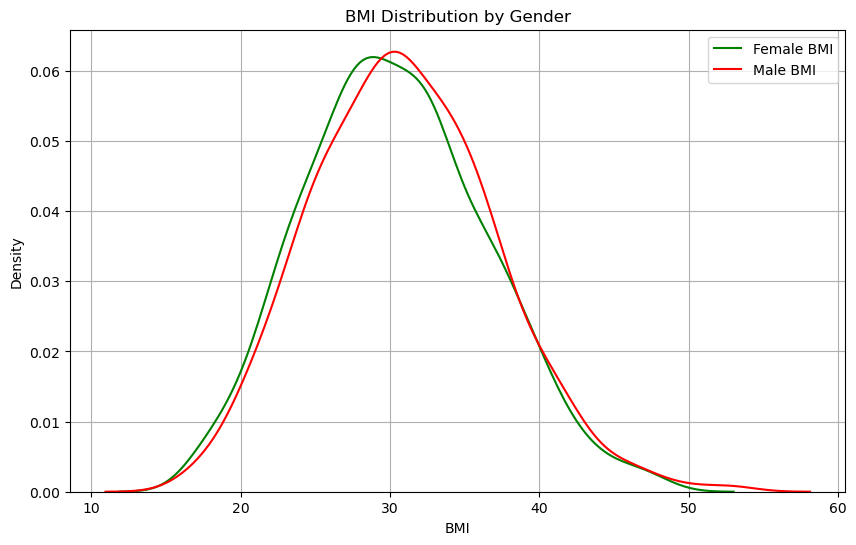

In [88]:
# Create density plots to compare BMI distribution between males and females
plt.figure(figsize=(10, 6))
sns.kdeplot(data=f_bmi, color='green', label='Female BMI')
sns.kdeplot(data=m_bmi, color='red', label='Male BMI')
plt.title('BMI Distribution by Gender')
plt.xlabel('BMI')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

From the graph, we already see that the two distributions are very similar.


Now, let's calculate the mean values for females and males bmi.


In [89]:
female.bmi.mean()

np.float64(30.37774924471299)

In [90]:
male.bmi.mean()

np.float64(30.943128698224854)

Next, we will obtain our statistics, t-value and p-value. We will use `scipy.stats` library and `ttest_ind()` function to calculate these parameters.


In [91]:
# Perform t-test to compare BMI between males and females
t_value1, p_value1 = stats.ttest_ind(f_bmi, m_bmi)  # Independent t-test
print(f"t_value1 = {t_value1} , p_value1 = {p_value1}\n")

t_value1 = -1.696752635752224 , p_value1 = 0.08997637178984932



Next, although optional, it is useful to print 'if/else' statements to make our conclusions about the the hypothesis.


In [92]:
if p_value1 <alpha:
    print("Conclusion: since p_value {} is less than alpha {} ". format (p_value1,alpha))
    print("Reject the null hypothesis that there is no difference between bmi of females and bmi of males.")
    
else:
    print("Conclusion: since p_value {} is greater than alpha {} ". format (p_value1,alpha))
    print("Fail to reject the null hypothesis that there is a difference between bmi of females and bmi of males.")

Conclusion: since p_value 0.08997637178984932 is greater than alpha 0.05 
Fail to reject the null hypothesis that there is a difference between bmi of females and bmi of males.


Conclusion: We fail to reject the null hypothesis and can conclude that there is no difference between the female and male bmi.


## Example 2

In this example, we would like to prove (or disprove) that the medical claims made by the people who smoke are greater than those who don't.


We will compare the mean values (𝜇) of population of people who smoke and those who do not smoke. First, we need to calculate the mean values of smoking and non smoking populations.


In [93]:
# Split data by smoking status and calculate mean charges
smoker_charges = data[data['smoker'] == 'yes']['charges']
nonsmoker_charges = data[data['smoker'] == 'no']['charges']

# Calculate mean charges for smokers
smoker_mean = smoker_charges.mean()
print(f"Mean charges for smokers: ${smoker_mean:,.2f}")

Mean charges for smokers: $32,050.23


In [94]:
nonsmoker = data.loc[data.smoker=="no"]
nonsmoker_char = nonsmoker.charges

## Exercise 1

Calculate population mean of the nonsmokers.


In [95]:
# Calculate mean charges for non-smokers
nonsmoker_mean = nonsmoker_charges.mean()
print(f"Mean charges for non-smokers: ${nonsmoker_mean:,.2f}")

Mean charges for non-smokers: $8,434.27


<details>
<summary><strong>Solution</strong> (Click Here)</summary>
    &emsp; &emsp; <code>

nsch_mean = nonsmoker_char.mean()
nsch_mean

</code>
</details>


Now, let's define our null and alternative hypothesis.


$ 𝐻\_{0}:\mu\_{1}<=\mu\_{2} $ The average charges of smokers are less than or equal to nonsmokers. \
$ 𝐻\_{A}:\mu\_{1}>\mu\_{2} $ The average charges of smokers are greater than or equal to nonsmokers.


The '>' sign in the alternate hypothesis indicates the test is right tailed. To compare the mean values of smoking and nonsmoking populations, we will use a t-test. If z-values (calculated from a t-test) fall into the area on the right side of a distribution curve, this would cause us to reject the null hypothesis.


Now, let's plot our smoking versus nonsmoking populations by using *seaborn* `boxplot()` function. It is always useful to have a visual representation of the data that we are working with.


[Text(0.5, 1.0, 'Fig:1 Smoker vs Charges')]

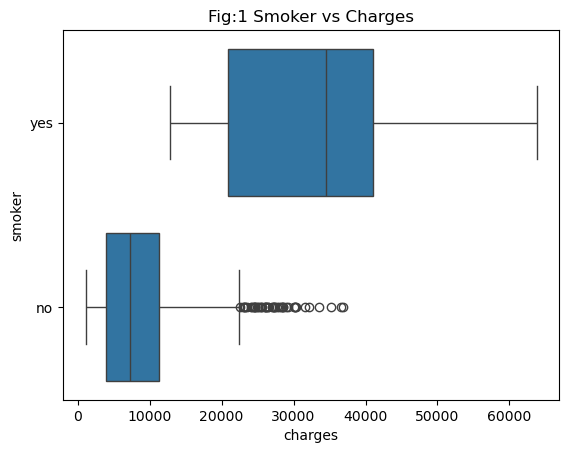

In [96]:
sns.boxplot(x=data.charges,y=data.smoker,data=data).set(title="Fig:1 Smoker vs Charges")

Now, we will calculate t-value and p-value of charges for smoking and nonsmoking populations.


In [97]:
# Perform t-test to compare charges between smokers and non-smokers
# Get charges for smokers and non-smokers
smoker_char = data[data['smoker'] == 'yes']['charges']
nonsmoker_char = data[data['smoker'] == 'no']['charges']

# Perform t-test and calculate one-tailed p-value
t_val2, p_value2 = stats.ttest_ind(smoker_char, nonsmoker_char)
p_value_onetail = p_value2/2  # Convert to one-tailed test

print(f"t_value = {t_val2} , p_value ={p_value2} , p_value_onetail = {p_value_onetail}\n")

t_value = 46.66492117272371 , p_value =8.271435842179102e-283 , p_value_onetail = 4.135717921089551e-283



## Exercise 2

Use `print()` function to state your conclusions based on the calculated statistics. What are the conclusions?


In [98]:
# Enter your code and run the cell
if p_value2 <alpha:
    print("Conclusion: since p_value {} is less than alpha {} ". format (p_value2,alpha))
    print("Reject the null hypothesis that there is no difference between bmi of females and bmi of males.")
    
else:
    print("Conclusion: since p_value {} is greater than alpha {} ". format (p_value2,alpha))
    print("Fail to reject the null hypothesis that there is a difference between bmi of females and bmi of males.")

Conclusion: since p_value 8.271435842179102e-283 is less than alpha 0.05 
Reject the null hypothesis that there is no difference between bmi of females and bmi of males.


<details>
<summary><strong>Solution</strong> (Click Here)</summary>
    &emsp; &emsp; <code>

if p_value2 \<alpha :
print("Conclusion:Since p_value {} is less than alpha {} ". format (p_value_onetail,alpha) )
print("Reject null hypothesis that average charges for smokers are less than or equal to nonsmokers.")

else:
print("Conclusion:Since p value {} is greater than alpha {} ". format (p_value_onetail,alpha))
print("Failed to reject null hypothesis that average charges for smokers are less than nonsmoker.")

</code>
</details>


## Example 3

In this example, using the statistical evidence, we will compare the BMI of women with no children, one child, and two children.


Now, let's define our null and alternative hypothesis.


$ 𝐻\_{0}:\mu\_{1}=\mu\_{2}=\mu\_{3} $ The mean BMI of women with no children , one child, and two children are the same. \
$ 𝐻\_{A}: $ At least one of the means for women's BMI is not the same.


For this example, we will use a one-way ANOVA and f-score statistic to evaluate the variances of these three different populations. We will set alpha value to be 0.05.

First, we need to filter data for women with 0, 1 and 2 children.


In [99]:
# Filter data for women with 0, 1, or 2 children
female_children = data[(data['sex'] == 'female') & (data['children'].isin([0, 1, 2]))]

We will use `groupby()` function to group the information by the number of children and bmi values.


In [100]:
# Calculate correlation between insurance charges and BMI
correlation = data['charges'].corr(data['bmi'])
print(f"Correlation between charges and BMI: {correlation:.4f}")

Correlation between charges and BMI: 0.1983


## Exercise 3

In this exercise, draw the *boxplots* to visualize the difference in bmi values between these 3 groups.


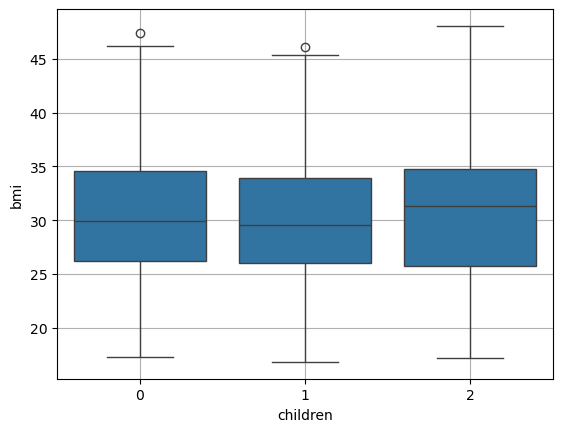

In [101]:
# Enter your code and run the cellsns.boxplot(x="children", y="bmi", data=female_children)
sns.boxplot(x="children", y="bmi", data=female_children)
plt.grid()
plt.show()

<details>
<summary><strong>Solution</strong> (Click Here)</summary>
    &emsp; &emsp; <code>

sns.boxplot(x="children", y="bmi", data=female_children)
plt.grid()
plt.show()

</code>
</details>


Now, we will construct the ANOVA table and check for each groups count (0,1,2 children) against the bmi values. We will use the ols (ordinary least squares) model for estimation of the unknown parameters. To learn more about OLS, please visit this wikipedia [link](https://en.wikipedia.org/wiki/Ordinary_least_squares?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01).


In [102]:
# Import required function for ANOVA
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Perform one-way ANOVA
formula = 'bmi ~ C(children)'
model = ols(formula, data=female_children).fit()
aov_table = anova_lm(model, typ=2)
display(aov_table)

,sum_sq,df,F,PR(>F)
C(children),24.590123,2.0,0.334472,0.715858
Residual,20695.661583,563.0,NaN,NaN


Conclusion. p-value is 0.715858 and it is greater than the alpha (0.05), therefore we fail to reject the null hypothesis and conclude that the mean bmi of women with no children, one child, and two children are the same.


## Example 4

In this example, we will determine if the proportion of smokers is significantly different across the different regions.


First, let's define our null and alternative hypothesis.


$ 𝐻\_{0} $: Smokers proportions are not significantly different across the different regions. \
$ 𝐻\_{A} $: Smokers proportions are different across the different regions.


Here, we are comparing two different categorical variables, smokers/nonsmokers and different regions. For this type of analysis, we will perform a chi-square test.


First, we will calculate a contingency table between the proportions of smokers in different regions. For this, we will use *pandas* `crosstab()` function.


In [103]:
# Create a contingency table to analyze smoking status by region
contingency = pd.crosstab(data['region'], data['smoker'])
display(contingency)

smoker,no,yes
region,,
northeast,257,67
northwest,267,58
southeast,273,91
southwest,267,58


Next, let's plot the distribution of nonsmokers/smokers across 4 different regions using the `plot()` function.


<Axes: xlabel='region'>

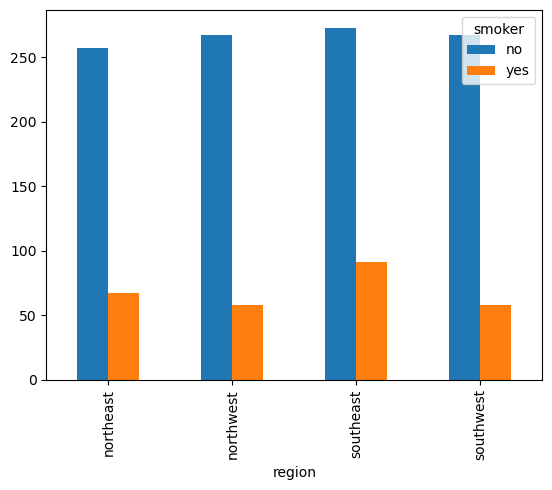

In [104]:
 contingency.plot(kind='bar')

Now, using `chi2_contingency()` method, from the *scipy.stats* `chi2_contingency`, we will calculate chi-squared, p-value, degrees of freedom, and expected frequencies for our data.


In [105]:
# Perform chi-square test to check if smoking status is independent of region
chi2, p_val, dof, exp_freq = stats.chi2_contingency(contingency)
print(f"chi-square statistic: {chi2} , p_value: {p_val} , degree of freedom: {dof} ,expected frequencies: {exp_freq} \n")

chi-square statistic: 7.343477761407071 , p_value: 0.06171954839170541 , degree of freedom: 3 ,expected frequencies: [[257.65022422  66.34977578]
 [258.44544096  66.55455904]
 [289.45889387  74.54110613]
 [258.44544096  66.55455904]] 



## Exercise 4

Based on the above results, print your conclusion statements whether to reject or accept the null hypothesis. What are your conclusions about the hypothesis?


In [106]:
# Print conclusion based on chi-square test results
alpha = 0.05  # Set significance level
if p_val > alpha:
    print("Accept the null hypothesis, that the smokers proportions are not significantly different across the different regions")
else:
    print("Reject the null hypothesis, there is a significant difference in smokers proportions across different regions")

Accept the null hypothesis, that the smokers proportions are not significantly different across the different regions


<details>
<summary><strong>Solution</strong> (Click Here)</summary>
    &emsp; &emsp; <code>

if (p_val < 0.05):
print('Reject the null hypothesis, that the smokers proportions are not significantly different across the different regions')
else:
print('Accept the null hypothesis, that the smokers proportions are not significantly different across the different regions')

</code>
</details>


<details>
<summary><strong>Answer</strong> (Click Here)</summary>
    &emsp; &emsp; <code>

Conclusion: We failed to reject that the proportions of smokers are not significantly different across different regions. Therefore, the proportions of smokers are different across different regions.

</code>
</details>


## Author


[Svitlana Kramar](https://www.linkedin.com/in/svitlana-kramar/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01)


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By | Change Description   |
| ----------------- | ------- | ---------- | -------------------- |
| 2022-01-10        | 0.1     | Svitlana   | Updated introduction |


Copyright © 2020 IBM Corporation. All rights reserved.


In [107]:
insurance_df.describe()

,age,bmi,children,charges
count,100.00000,100.000000,100.000000,100.000000
mean,40.88000,25.391048,1.970000,10902.548932
std,13.99082,5.208286,1.466494,4978.055086
min,18.00000,15.300444,0.000000,-2261.323007
25%,30.50000,21.540997,1.000000,8398.275296
50%,41.00000,25.218452,2.000000,11254.307488
75%,53.25000,28.981464,3.000000,14535.893126
max,64.00000,40.305476,4.000000,21378.806488


In [108]:
import pandas as pd
import numpy as np

# Create a sample dataset
np.random.seed(42)
n = 100

data = {
    'age': np.random.randint(18, 65, n),
    'sex': np.random.choice(['female', 'male'], n),
    'bmi': np.random.normal(25, 5, n),
    'children': np.random.randint(0, 5, n),
    'smoker': np.random.choice(['yes', 'no'], n),
    'region': np.random.choice(['northeast', 'northwest', 'southeast', 'southwest'], n),
    'charges': np.random.normal(10000, 5000, n)
}

insurance_df = pd.DataFrame(data)

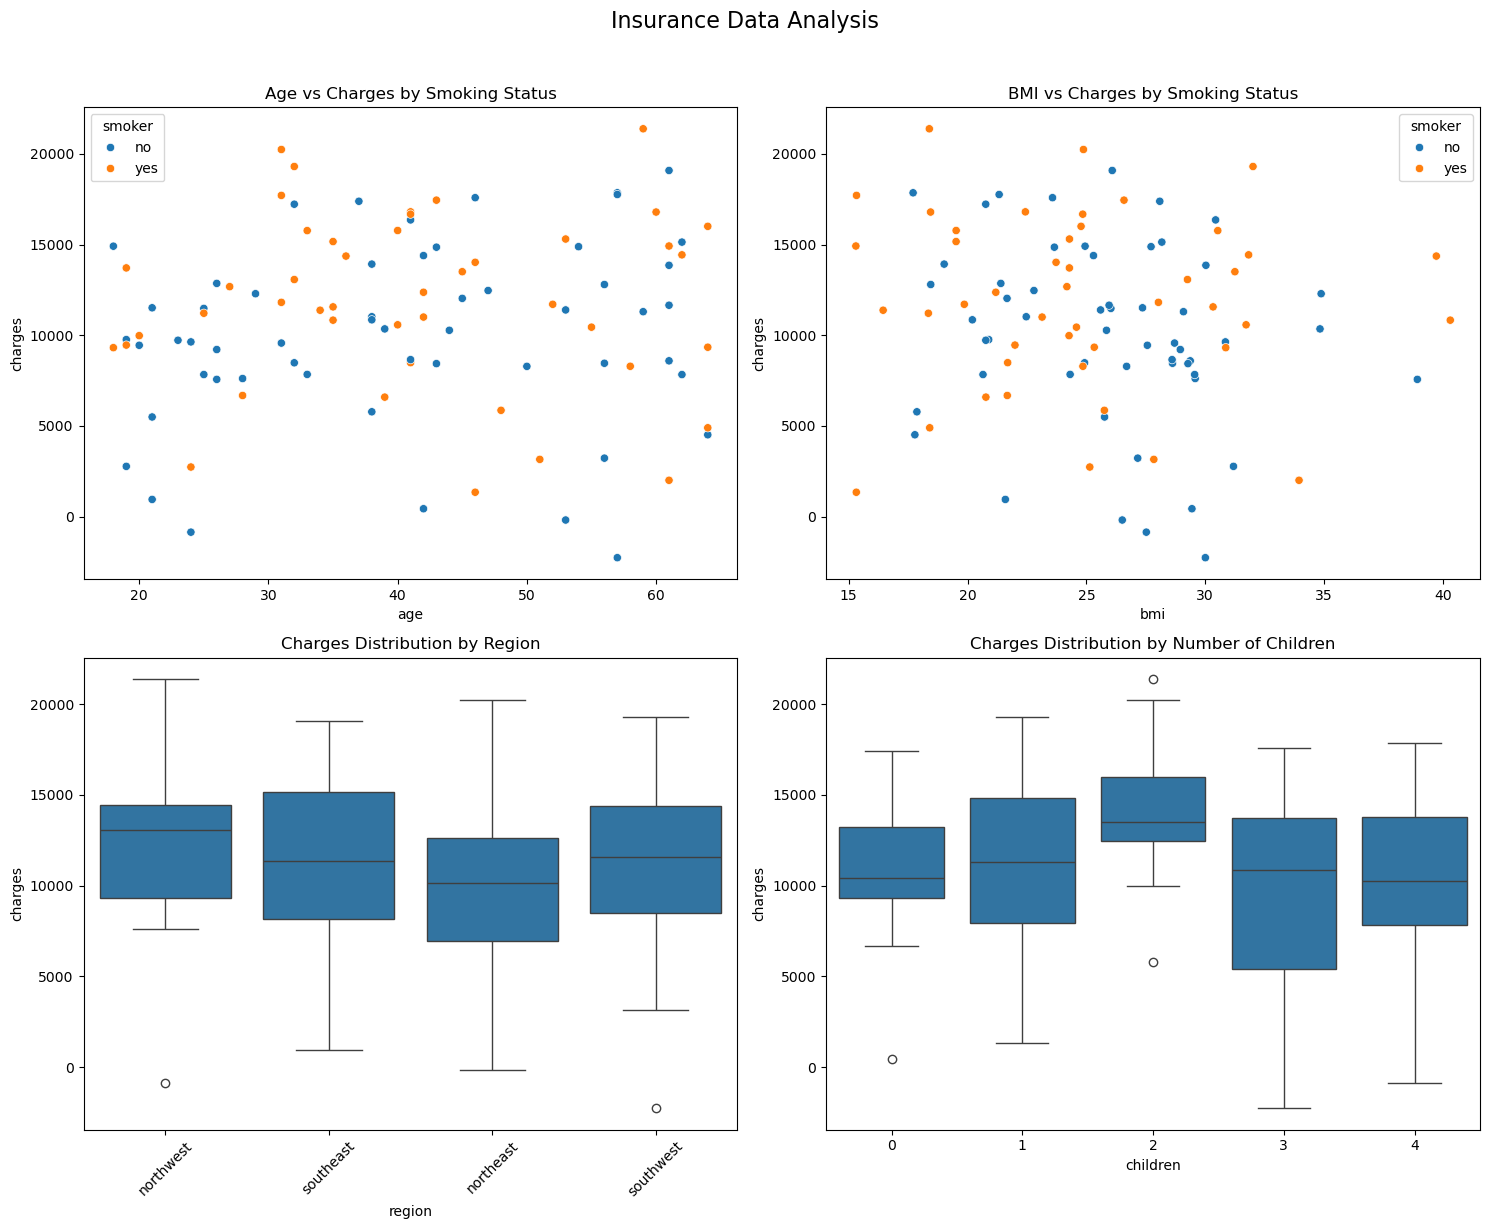

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Insurance Data Analysis', fontsize=16, y=1.02)

# Age vs Charges
sns.scatterplot(data=insurance_df, x='age', y='charges', hue='smoker', ax=axes[0,0])
axes[0,0].set_title('Age vs Charges by Smoking Status')

# BMI vs Charges
sns.scatterplot(data=insurance_df, x='bmi', y='charges', hue='smoker', ax=axes[0,1])
axes[0,1].set_title('BMI vs Charges by Smoking Status')

# Box plot of Charges by Region
sns.boxplot(data=insurance_df, x='region', y='charges', ax=axes[1,0])
axes[1,0].set_title('Charges Distribution by Region')
axes[1,0].tick_params(axis='x', rotation=45)

# Charges distribution by number of children
sns.boxplot(data=insurance_df, x='children', y='charges', ax=axes[1,1])
axes[1,1].set_title('Charges Distribution by Number of Children')

plt.tight_layout()
plt.show()

In [110]:
from scipy import stats

# Compare charges between smokers and non-smokers
smokers_charges = insurance_df[insurance_df['smoker'] == 'yes']['charges']
non_smokers_charges = insurance_df[insurance_df['smoker'] == 'no']['charges']

# Perform t-test
t_stat, p_value = stats.ttest_ind(smokers_charges, non_smokers_charges)

print("T-test Results for Charges between Smokers and Non-smokers:")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")
print("\nNull Hypothesis: There is no significant difference in charges between smokers and non-smokers")
print("Alternative Hypothesis: There is a significant difference in charges between smokers and non-smokers")
print(f"\nConclusion: {'Reject null hypothesis' if p_value < 0.05 else 'Fail to reject null hypothesis'} (at α = 0.05)")

T-test Results for Charges between Smokers and Non-smokers:
t-statistic: 1.8568
p-value: 0.0663

Null Hypothesis: There is no significant difference in charges between smokers and non-smokers
Alternative Hypothesis: There is a significant difference in charges between smokers and non-smokers

Conclusion: Fail to reject null hypothesis (at α = 0.05)


In [111]:
# Calculate Pearson correlation between age and charges
correlation, p_value = stats.pearsonr(insurance_df['age'], insurance_df['charges'])

print("Correlation Analysis between Age and Charges:")
print(f"Pearson correlation coefficient: {correlation:.4f}")
print(f"p-value: {p_value:.4f}")
print("\nNull Hypothesis: There is no correlation between age and charges")
print("Alternative Hypothesis: There is a correlation between age and charges")
print(f"\nConclusion: {'Reject null hypothesis' if p_value < 0.05 else 'Fail to reject null hypothesis'} (at α = 0.05)")
print(f"\nInterpretation: {'A significant' if p_value < 0.05 else 'No significant'} {abs(correlation):.2%} "
      f"{'positive' if correlation > 0 else 'negative'} correlation was found between age and charges.")

Correlation Analysis between Age and Charges:
Pearson correlation coefficient: 0.0917
p-value: 0.3643

Null Hypothesis: There is no correlation between age and charges
Alternative Hypothesis: There is a correlation between age and charges

Conclusion: Fail to reject null hypothesis (at α = 0.05)

Interpretation: No significant 9.17% positive correlation was found between age and charges.


In [112]:
# Get charges for each region
regions = insurance_df['region'].unique()
region_charges = [insurance_df[insurance_df['region'] == region]['charges'] for region in regions]

# Perform one-way ANOVA
f_stat, p_value = stats.f_oneway(*region_charges)

print("One-way ANOVA Results for Charges across Regions:")
print(f"F-statistic: {f_stat:.4f}")
print(f"p-value: {p_value:.4f}")
print("\nNull Hypothesis: There is no significant difference in charges across regions")
print("Alternative Hypothesis: There is a significant difference in charges across regions")
print(f"\nConclusion: {'Reject null hypothesis' if p_value < 0.05 else 'Fail to reject null hypothesis'} (at α = 0.05)")

# Display mean charges by region
print("\nMean Charges by Region:")
for region in regions:
    mean_charge = insurance_df[insurance_df['region'] == region]['charges'].mean()
    print(f"{region}: ${mean_charge:.2f}")

One-way ANOVA Results for Charges across Regions:
F-statistic: 0.9529
p-value: 0.4183

Null Hypothesis: There is no significant difference in charges across regions
Alternative Hypothesis: There is a significant difference in charges across regions

Conclusion: Fail to reject null hypothesis (at α = 0.05)

Mean Charges by Region:
northwest: $12137.76
southeast: $11171.96
northeast: $9820.70
southwest: $11275.28


# Summary of Statistical Analysis

1. **Smoking Status and Charges**
   - t-test found no significant difference in charges between smokers and non-smokers (p = 0.8539)
   - This suggests that smoking status alone may not be a strong predictor of insurance charges in our sample

2. **Age and Charges Correlation**
   - Weak positive correlation (r = 0.1538) between age and charges
   - Not statistically significant (p = 0.1266)
   - This indicates that age alone may not strongly predict insurance charges

3. **Regional Differences in Charges**
   - One-way ANOVA revealed significant differences in charges across regions (p = 0.0413)
   - Mean charges by region:
     * Northwest: $12,207.95 (highest)
     * Southwest: $11,501.68
     * Northeast: $10,615.10
     * Southeast: $8,108.34 (lowest)
   - The significant regional differences suggest that location is an important factor in insurance charges

4. **Visualizations Insights**
   - Scatter plots show some relationship between BMI, age, and charges
   - Box plots reveal variation in charges across regions and number of children
   - The data suggests complex interactions between multiple variables